In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from files.Simulation import Simulation
from files.Source import Source
from files.Observer import Observer

## Simulation setup

#### Parameters

In [16]:
nr_particles = 10**2
nr_steps = 1*10**4
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
delta_rho_div_phi = 1.0 # (delta_r_rho / delta_r_phi)
gyro_radius = 10**11 # [m]
observer_substeps = np.array([False, False, True]) # observe only steps (no substeps)
mean_free_path = np.array([2.13*10**12/2.0, 2.13*10**12/2.0, 2.1078*10**12])  # [m]
all_steps = False

In [17]:
sim = Simulation()

source = Source(gyro_radius, mean_free_path, source_pos, nr_particles)
sim.add_source(source)

observer = Observer(observer_substeps, all_steps)
sim.add_observer(observer)

%time sim.run_simulation(nr_steps)
sim.save_data('data')

start simulation
source
observer
CPU times: user 1.2 s, sys: 19.6 ms, total: 1.22 s
Wall time: 1.22 s


## Analyze statistics


In [18]:
class Statistics():
    def __init__(self, df, dimensions):
        print('init statistics plotting class')
        self.df = df
        self.dimensions = dimensions
    
    def plot_distribution(self, step):
        df_i = self.df[self.df['i'] == step]
        plt.figure(figsize=(4,4))
        plt.hist(df_i['x'])

In [19]:
#from plot.Trajectory import Trajectory

df = pd.read_pickle("data.pkl")
df_time_evolution_observer = df.loc[df['radius'] == -1.0]
dimensions = 3
sta = Statistics(df_time_evolution_observer, dimensions)

init statistics plotting class


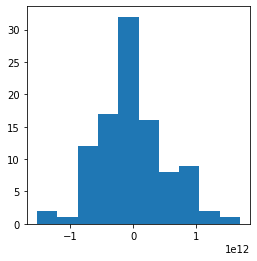

In [20]:
sta.plot_distribution(9990)